## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  30.915880   608.651104  0.282663  8.373597  1.464766
1  22.722223  1254.051677  0.754570  5.514974  1.597571
2   7.931762   219.835852  0.492353  7.527371  1.423442
3  97.946797   240.639075  0.152115  7.548512  0.491053
4  22.060539   537.597424  0.205829  8.468010  1.404837


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.7853386	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.7795802	total: 69.8ms	remaining: 34.8s
2:	learn: 0.7723208	total: 70.4ms	remaining: 23.4s
3:	learn: 0.7646363	total: 70.9ms	remaining: 17.6s
4:	learn: 0.7575023	total: 71.4ms	remaining: 14.2s
5:	learn: 0.7524049	total: 72.1ms	remaining: 11.9s
6:	learn: 0.7454825	total: 72.5ms	remaining: 10.3s
7:	learn: 0.7381819	total: 73.4ms	remaining: 9.1s
8:	learn: 0.7306856	total: 73.9ms	remaining: 8.14s
9:	learn: 0.7237525	total: 74.5ms	remaining: 7.37s
10:	learn: 0.7168047	total: 74.9ms	remaining: 6.74s
11:	learn: 0.7101810	total: 75.3ms	remaining: 6.2s
12:	learn: 0.7042004	total: 75.8ms	remaining: 5.75s
13:	learn: 0.6983160	total: 76.3ms	remaining: 5.38s
14:	learn: 0.6912169	total: 76.9ms	remaining: 5.05s
15:	learn: 0.6852206	total: 77.3ms	remaining: 4.75s
16:	learn: 0.6784405	total: 77.8ms	remaining: 4.5s
17:	learn: 0.6724728	total: 78.3ms	remaining: 4.27s
18:	learn: 0.6672682	total: 78.7ms	remaining: 4

86:	learn: 0.3858592	total: 109ms	remaining: 1.15s
87:	learn: 0.3828518	total: 110ms	remaining: 1.14s
88:	learn: 0.3802484	total: 110ms	remaining: 1.13s
89:	learn: 0.3782313	total: 111ms	remaining: 1.12s
90:	learn: 0.3755258	total: 111ms	remaining: 1.11s
91:	learn: 0.3728043	total: 111ms	remaining: 1.1s
92:	learn: 0.3704101	total: 112ms	remaining: 1.09s
93:	learn: 0.3678504	total: 112ms	remaining: 1.08s
94:	learn: 0.3649739	total: 112ms	remaining: 1.07s
95:	learn: 0.3620201	total: 113ms	remaining: 1.06s
96:	learn: 0.3598139	total: 113ms	remaining: 1.05s
97:	learn: 0.3585800	total: 113ms	remaining: 1.04s
98:	learn: 0.3553414	total: 114ms	remaining: 1.03s
99:	learn: 0.3528865	total: 114ms	remaining: 1.03s
100:	learn: 0.3505953	total: 115ms	remaining: 1.02s
101:	learn: 0.3481888	total: 115ms	remaining: 1.01s
102:	learn: 0.3460796	total: 115ms	remaining: 1s
103:	learn: 0.3444594	total: 116ms	remaining: 997ms
104:	learn: 0.3420664	total: 116ms	remaining: 991ms
105:	learn: 0.3394949	total: 1

255:	learn: 0.1651687	total: 187ms	remaining: 542ms
256:	learn: 0.1645345	total: 187ms	remaining: 541ms
257:	learn: 0.1639638	total: 188ms	remaining: 539ms
258:	learn: 0.1632100	total: 188ms	remaining: 538ms
259:	learn: 0.1624578	total: 188ms	remaining: 536ms
260:	learn: 0.1619367	total: 189ms	remaining: 535ms
261:	learn: 0.1615339	total: 190ms	remaining: 534ms
262:	learn: 0.1610409	total: 190ms	remaining: 532ms
263:	learn: 0.1604498	total: 190ms	remaining: 531ms
264:	learn: 0.1598987	total: 191ms	remaining: 529ms
265:	learn: 0.1592553	total: 191ms	remaining: 528ms
266:	learn: 0.1586178	total: 192ms	remaining: 527ms
267:	learn: 0.1578143	total: 192ms	remaining: 525ms
268:	learn: 0.1571565	total: 193ms	remaining: 524ms
269:	learn: 0.1564573	total: 193ms	remaining: 523ms
270:	learn: 0.1560240	total: 194ms	remaining: 521ms
271:	learn: 0.1554626	total: 194ms	remaining: 520ms
272:	learn: 0.1549301	total: 195ms	remaining: 518ms
273:	learn: 0.1544036	total: 195ms	remaining: 517ms
274:	learn: 

494:	learn: 0.0820444	total: 291ms	remaining: 297ms
495:	learn: 0.0817800	total: 292ms	remaining: 296ms
496:	learn: 0.0817242	total: 292ms	remaining: 296ms
497:	learn: 0.0813343	total: 293ms	remaining: 295ms
498:	learn: 0.0812790	total: 293ms	remaining: 294ms
499:	learn: 0.0812247	total: 294ms	remaining: 294ms
500:	learn: 0.0808501	total: 294ms	remaining: 293ms
501:	learn: 0.0807390	total: 295ms	remaining: 292ms
502:	learn: 0.0803642	total: 295ms	remaining: 292ms
503:	learn: 0.0802559	total: 296ms	remaining: 291ms
504:	learn: 0.0798959	total: 296ms	remaining: 290ms
505:	learn: 0.0798456	total: 297ms	remaining: 290ms
506:	learn: 0.0797958	total: 297ms	remaining: 289ms
507:	learn: 0.0797432	total: 298ms	remaining: 288ms
508:	learn: 0.0793709	total: 298ms	remaining: 288ms
509:	learn: 0.0793190	total: 299ms	remaining: 287ms
510:	learn: 0.0792679	total: 299ms	remaining: 286ms
511:	learn: 0.0791644	total: 300ms	remaining: 286ms
512:	learn: 0.0788067	total: 300ms	remaining: 285ms
513:	learn: 

663:	learn: 0.0591214	total: 369ms	remaining: 187ms
664:	learn: 0.0590342	total: 369ms	remaining: 186ms
665:	learn: 0.0589393	total: 370ms	remaining: 185ms
666:	learn: 0.0587323	total: 370ms	remaining: 185ms
667:	learn: 0.0586467	total: 371ms	remaining: 184ms
668:	learn: 0.0584287	total: 371ms	remaining: 184ms
669:	learn: 0.0583714	total: 372ms	remaining: 183ms
670:	learn: 0.0582865	total: 372ms	remaining: 182ms
671:	learn: 0.0581166	total: 372ms	remaining: 182ms
672:	learn: 0.0580227	total: 373ms	remaining: 181ms
673:	learn: 0.0579659	total: 373ms	remaining: 181ms
674:	learn: 0.0578965	total: 374ms	remaining: 180ms
675:	learn: 0.0577287	total: 374ms	remaining: 179ms
676:	learn: 0.0576626	total: 375ms	remaining: 179ms
677:	learn: 0.0574627	total: 375ms	remaining: 178ms
678:	learn: 0.0573978	total: 375ms	remaining: 177ms
679:	learn: 0.0571280	total: 376ms	remaining: 177ms
680:	learn: 0.0570640	total: 376ms	remaining: 176ms
681:	learn: 0.0568693	total: 377ms	remaining: 176ms
682:	learn: 

898:	learn: 0.0343412	total: 474ms	remaining: 53.3ms
899:	learn: 0.0343295	total: 475ms	remaining: 52.8ms
900:	learn: 0.0343193	total: 475ms	remaining: 52.2ms
901:	learn: 0.0342146	total: 476ms	remaining: 51.7ms
902:	learn: 0.0342031	total: 476ms	remaining: 51.1ms
903:	learn: 0.0341917	total: 477ms	remaining: 50.6ms
904:	learn: 0.0341141	total: 477ms	remaining: 50.1ms
905:	learn: 0.0340703	total: 477ms	remaining: 49.5ms
906:	learn: 0.0339942	total: 478ms	remaining: 49ms
907:	learn: 0.0339018	total: 478ms	remaining: 48.5ms
908:	learn: 0.0338587	total: 479ms	remaining: 47.9ms
909:	learn: 0.0338475	total: 479ms	remaining: 47.4ms
910:	learn: 0.0338050	total: 479ms	remaining: 46.8ms
911:	learn: 0.0336726	total: 480ms	remaining: 46.3ms
912:	learn: 0.0335981	total: 480ms	remaining: 45.7ms
913:	learn: 0.0334971	total: 480ms	remaining: 45.2ms
914:	learn: 0.0334555	total: 481ms	remaining: 44.7ms
915:	learn: 0.0334144	total: 481ms	remaining: 44.1ms
916:	learn: 0.0333409	total: 482ms	remaining: 43

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

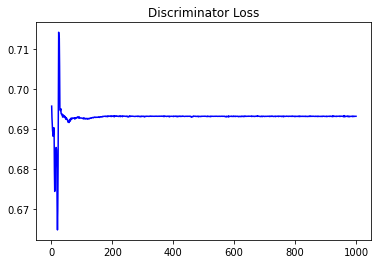

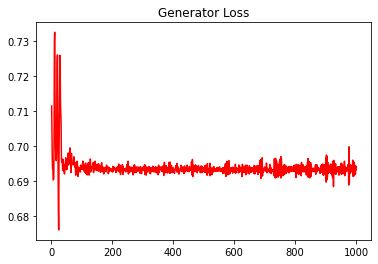

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5550965200856194


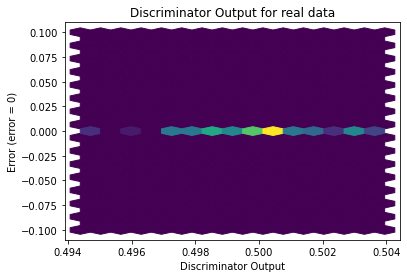

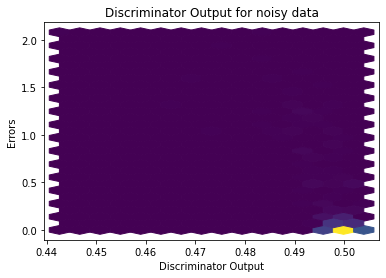

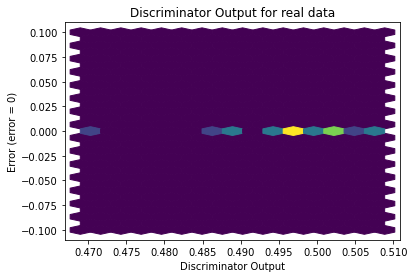

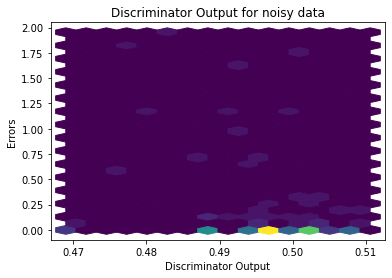

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


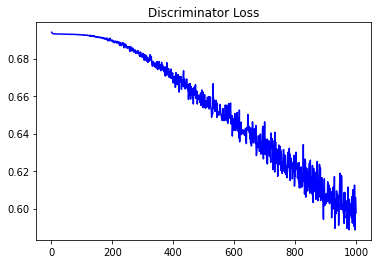

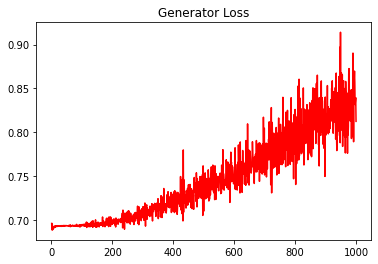

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5924957103778851


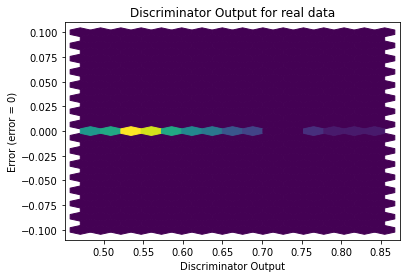

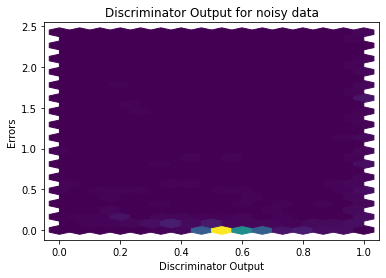

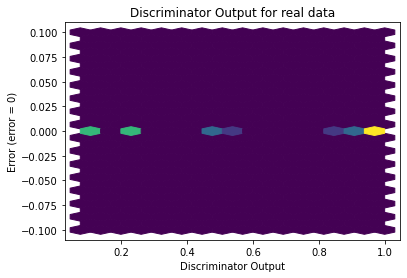

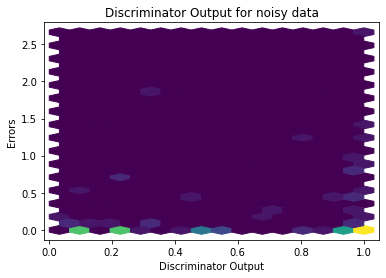

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
